In [10]:
import numpy as np
import matplotlib.pyplot as plt

In [46]:
fileSuffixes = ['01', '05', '10', '25', '50', '75', 'full']
filePath = '../data/results_{}.csv'

percentages = np.array(['01', '05', '10', '25', '50', '75', '100']).astype(float)
trainRes = []
valRes = []
testRes = []

for suf in fileSuffixes:
    with open(filePath.format(suf)) as fp:
        sampleTrainRes, sampleValRes, sampleTestRes = fp.readline().strip().split(',')
    trainRes.append(float(sampleTrainRes))
    valRes.append(float(sampleValRes))
    testRes.append(float(sampleTestRes))
    
trainRes = np.array(trainRes)
valRes = np.array(valRes)
testRes = np.array(testRes)

In [45]:
fileSuffixes = ['01', '05', '10', '25', '50', '75']
filePath = '../data/results_NB_{}.csv'

controlPercentages = np.array(['01', '05', '10', '25', '50', '75']).astype(float)
controlTrainRes = []
controlValRes = []
controlTestRes = []

for suf in fileSuffixes:
    with open(filePath.format(suf)) as fp:
        sampleTrainRes, sampleValRes, sampleTestRes = fp.readline().strip().split(',')
    controlTrainRes.append(float(sampleTrainRes))
    controlValRes.append(float(sampleValRes))
    controlTestRes.append(float(sampleTestRes))
    
controlTrainRes.append(.768)
controlValRes.append(.676)
controlTestRes.append(.664)

controlTrainRes = np.array(controlTrainRes)
controlValRes = np.array(controlValRes)
controlTestRes = np.array(controlTestRes)

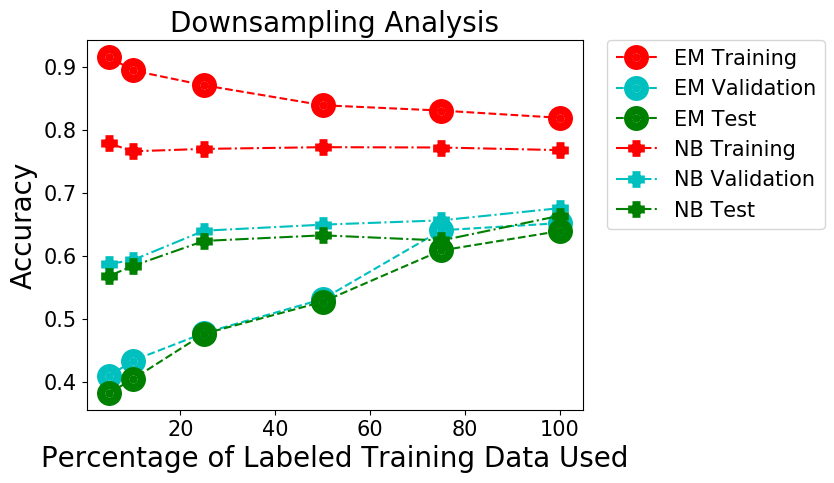

In [73]:
plt.rcParams.update(plt.rcParamsDefault)
#plt.rcParams.update({'font.size': 12})
plt.rcParams['xtick.labelsize']=15
plt.rcParams['ytick.labelsize']=15


plt.plot(percentages[1:], trainRes[1:], 'ro--', label='EM Training', mew=12)
plt.plot(percentages[1:], valRes[1:], 'co--', label='EM Validation', mew=12)
plt.plot(percentages[1:], testRes[1:], 'go--', label='EM Test', mew=12)

plt.plot(percentages[1:], controlTrainRes[1:], 'r+-.', label='NB Training', mew=12)
plt.plot(percentages[1:], controlValRes[1:], 'c+-.', label='NB Validation', mew=12)
plt.plot(percentages[1:], controlTestRes[1:], 'g+-.', label='NB Test', mew=12)

# plt.plot(percentages[1:], controlTrainRes[1:]-trainRes[1:], 'o--', label='NB Training')
# plt.plot(percentages[1:], controlValRes[1:]-valRes[1:], 'o--', label='NB Validation')
# plt.plot(percentages[1:], controlTestRes[1:]-testRes[1:], 'o--', label='NB Test')

plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0., fontsize=15)
# plt.legend(fontsize=15)
plt.title('Downsampling Analysis', fontsize=20)
plt.xlabel('Percentage of Labeled Training Data Used', fontsize=20)
plt.ylabel('Accuracy', fontsize=20)
plt.savefig('../data/downsampling_EM.png')